In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load the dataset
df = pd.read_excel('Concrete_Data.xls')  # Replace with your actual file path if different

# Display the first few rows
print(df.head())


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [5]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)


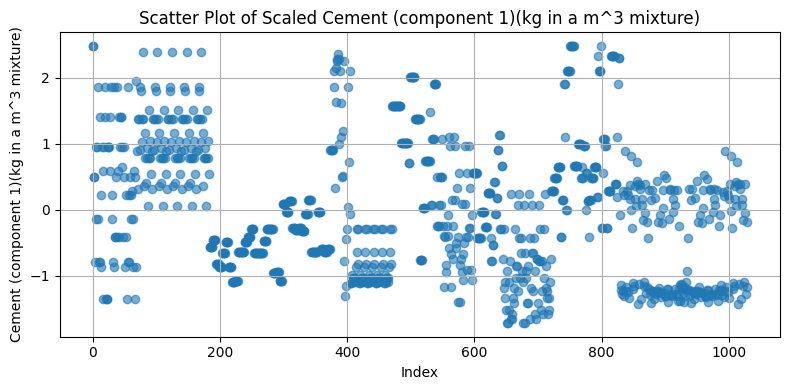

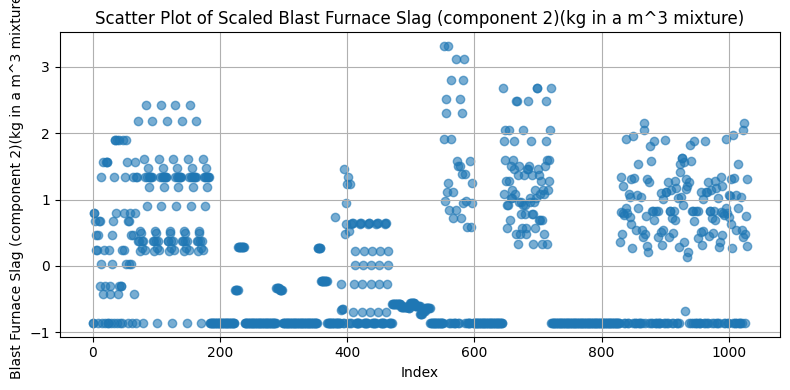

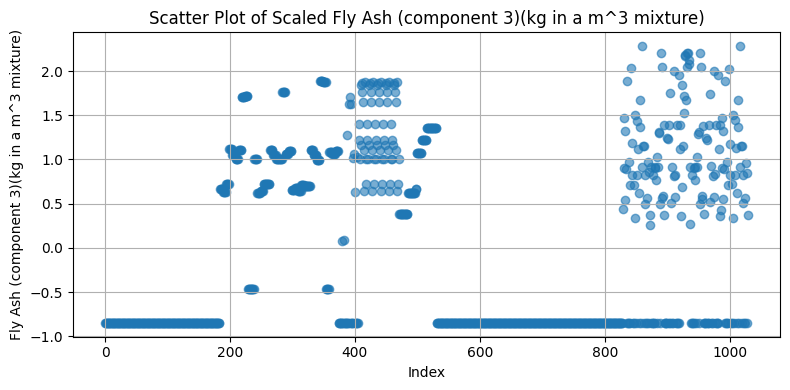

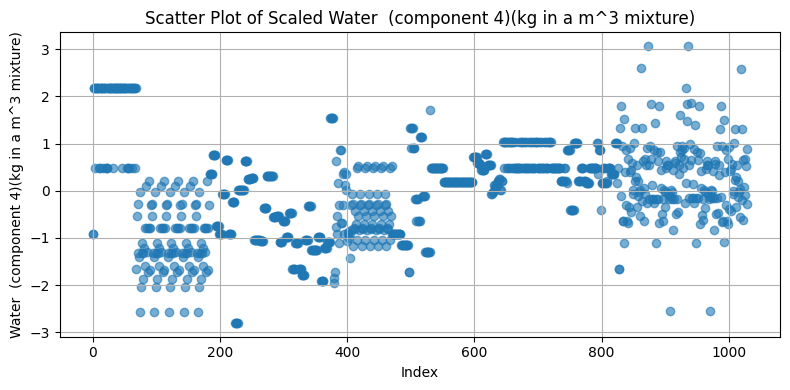

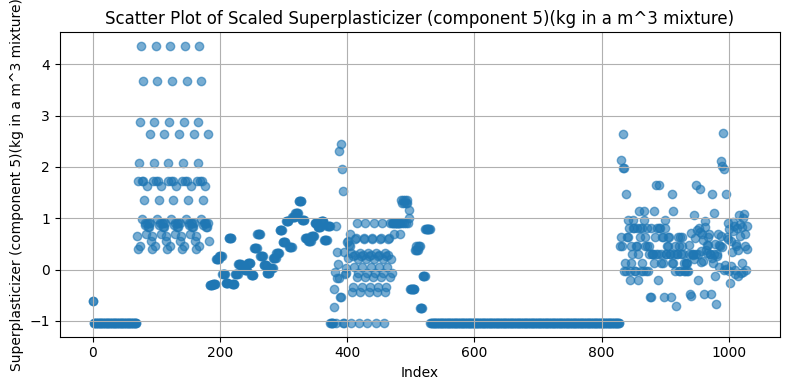

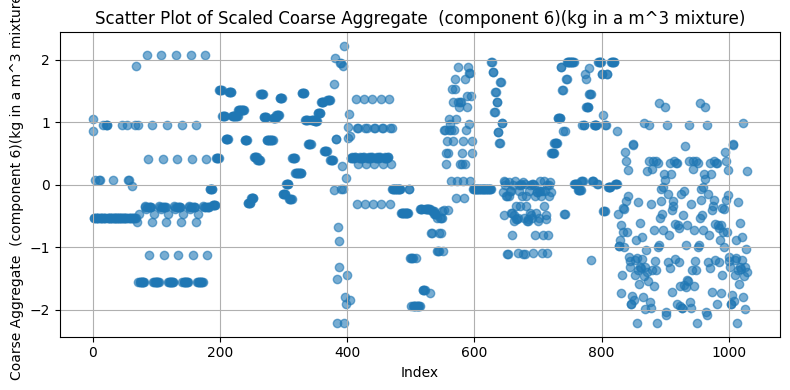

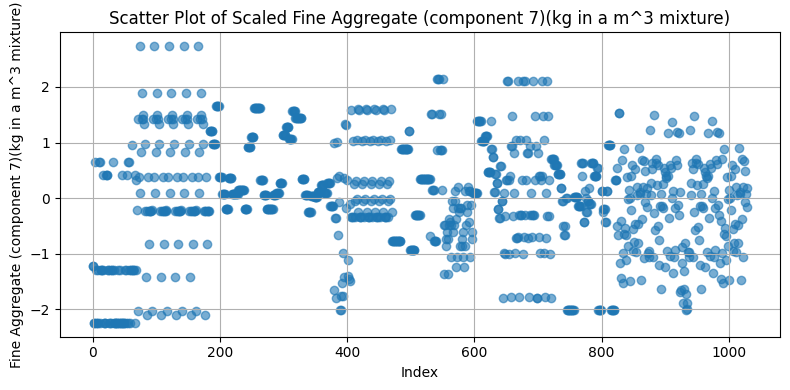

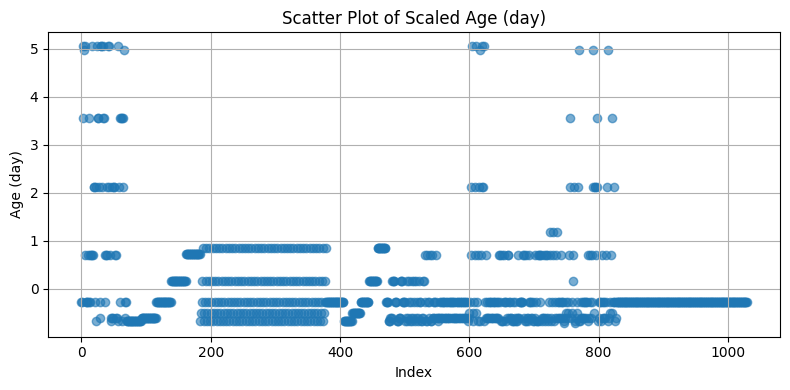

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import time  # Optional: add delay between plots

# Convert scaled X to a DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot each column one by one
for col in scaled_df.columns:
    plt.figure(figsize=(8, 4))
    plt.scatter(scaled_df.index, scaled_df[col], alpha=0.6)
    plt.title(f'Scatter Plot of Scaled {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

In [13]:
scaled_df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [18]:
furnace_outliers_rows = scaled_df[scaled_df["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"] > 3].index
water_outliers_rows = scaled_df[scaled_df["Water  (component 4)(kg in a m^3 mixture)"] > 2.5].index
superplasticizer_outliers_rows = scaled_df[scaled_df["Superplasticizer (component 5)(kg in a m^3 mixture)"] > 3].index
fine_aggregate_outliers_rows = scaled_df[scaled_df["Fine Aggregate (component 7)(kg in a m^3 mixture)"] > 2.5].index


In [26]:
def outlierfiller(outlierrows, column):
    mean_value = df[column].mean()
    for idx in outlierrows:
        if idx in df.index:
            df.at[idx, column] = mean_value
            print(f"Filled outlier at index {idx} in '{column}' with mean {mean_value:.2f}")

# Outlier row indices (already defined earlier)
outlier = [
    furnace_outliers_rows,
    water_outliers_rows,
    superplasticizer_outliers_rows,
    fine_aggregate_outliers_rows
]

# Corresponding columns
col = [
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
    'Water  (component 4)(kg in a m^3 mixture)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)'
]

# Apply outlier replacement
for i, a in zip(outlier, col):
    outlierfiller(i, a)


Filled outlier at index 553 in 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' with mean 73.90
Filled outlier at index 559 in 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' with mean 73.90
Filled outlier at index 571 in 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' with mean 73.90
Filled outlier at index 584 in 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' with mean 73.90
Filled outlier at index 862 in 'Water  (component 4)(kg in a m^3 mixture)' with mean 181.57
Filled outlier at index 873 in 'Water  (component 4)(kg in a m^3 mixture)' with mean 181.57
Filled outlier at index 936 in 'Water  (component 4)(kg in a m^3 mixture)' with mean 181.57
Filled outlier at index 1019 in 'Water  (component 4)(kg in a m^3 mixture)' with mean 181.57
Filled outlier at index 76 in 'Superplasticizer (component 5)(kg in a m^3 mixture)' with mean 6.20
Filled outlier at index 79 in 'Superplasticizer (component 5)(kg in a m^3 mixture)' with mean 6.20
Filled outlier at ind

In [30]:
scaled_df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00


In [34]:
from sklearn.model_selection import train_test_split
# Drop aggregate features from scaled_df
scaled_df = scaled_df.drop(['Fine Aggregate (component 7)(kg in a m^3 mixture)',
                            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df, y, test_size=0.2, random_state=42
)


In [38]:

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")


Linear Regression Results:
Mean Squared Error (MSE): 95.64
R-squared (R² Score): 0.63


R² Score: 0.8861714565117065
MSE: 29.331462942196595
MAE: 4.046972075872199


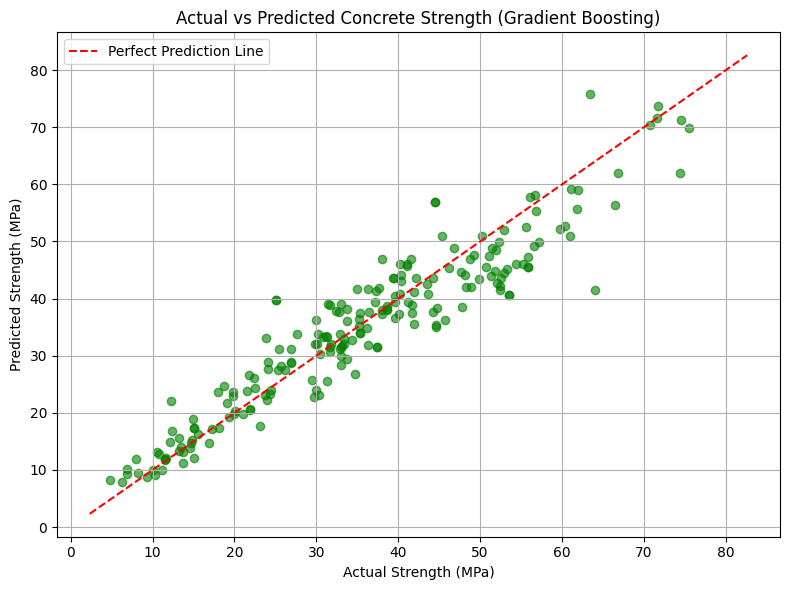

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Initialize and train Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict on test set
y_pred = gbr_model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted Concrete Strength (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
